## Intro to Autoencoders in python 

Autoencoders are special types of neural networks that are often attributed to non-linear PCA (principal component analysis). Autoencoders have several use cases. In this blog post we will discuss autoencoders in the context of data quality. We will use autoencoders to detect outliers in data. For example, given an image of a handwrtten digit, an autoencoder first encodes the image into a lower dimensional latent space like PCA, then decodes the latent representation back to an image. Autoencoders can also be used for to compress images, they do this while minimizing the *reconstruction error*. 

The reconstruction error here means the difference (by some distance measure) between the actual image and reconstructed image.

## Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Loading the data
The Fashon MNIST dataset is a very familiar data set that has been used in many tutorials to explain simple concepts about neural networks. We will do the same in this blog post.  Each image in the MNIST dataset is 28x28 pixels. We will further scale the pixel value to lie in the interval [0,1].

In [4]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


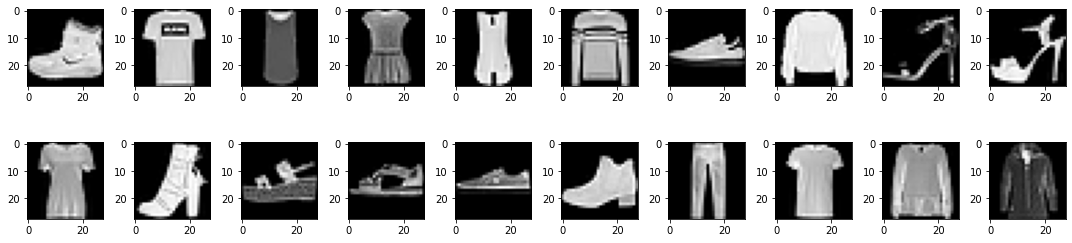

In [8]:
num = 20
images = x_train[:num]
# labels = y_train[:num]

num_row = 2
num_col = 10
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    # ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()


We have printed the dimension  of the train and test dataset,  there are 60k images in the training dataset and 10k in the test.
We will define a very simple autoencoder which compresses (`encoder`)the input images into a 64 dimensional laten vector, and a `decoder`, that reconstructs the original image from the latent space. We define a simple class for this. The constructor of the class takes the dimension of the latent space.For the encoder, we will use `Tensoflow`'s `Sequential` API. We first flatten the images and then pass it to a dense layer. The decoder has one dense layer and then reshapes the image back to ther original dimension. 

In [16]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [18]:
# instantial the Autoencoder class
autoencoder = Autoencoder(latent_dim)

In [19]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [20]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0239 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.0116 - val_loss: 0.0108
Epoch 3/10
1875/1875 [==============================] - 2s 941us/step - loss: 0.0100 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 2s 983us/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step -